# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="
record = 1
set = 1

lat = []
lng = []
max_temp = []
humidity = []
cloud = []
wind= []
country = []
date = []
cities_trim = []

print("Beginning Data Retrival")
print("----------------------------")
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        print(f"Processing Record {record} of Set {set} | {city}")
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        cities_trim.append(city)
    except:
        print("City " + "\033[1m" + "not" + "\033[0m" + " found. Skipping...")
        pass
    record += 1
    if record == 51:
        set += 1
        record = 1

Beginning Data Retrival
----------------------------
Processing Record 1 of Set 1 | smithers
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | trairi
Processing Record 4 of Set 1 | nyurba
Processing Record 5 of Set 1 | tuatapere
Processing Record 6 of Set 1 | north bend
Processing Record 7 of Set 1 | saint george
Processing Record 8 of Set 1 | east london
Processing Record 9 of Set 1 | guerrero negro
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | talnakh
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | arraial do cabo
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | qaanaaq
Processing Record 16 of Set 1 | narsaq
Processing Record 17 of Set 1 | arlit
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | manado
Processing Record 22 of Set 1 | jamestown
Processing Record 23 of Set 1 | longy

Processing Record 36 of Set 4 | broome
Processing Record 37 of Set 4 | bogotol
Processing Record 38 of Set 4 | severo-kurilsk
Processing Record 39 of Set 4 | haapiti
Processing Record 40 of Set 4 | san jose
Processing Record 41 of Set 4 | braco do norte
Processing Record 42 of Set 4 | zheleznodorozhnyy
Processing Record 43 of Set 4 | cabedelo
Processing Record 44 of Set 4 | hualmay
Processing Record 45 of Set 4 | sainte-anne-des-monts
Processing Record 46 of Set 4 | nizhniy kuranakh
Processing Record 47 of Set 4 | barabinsk
Processing Record 48 of Set 4 | airai
Processing Record 49 of Set 4 | isangel
Processing Record 50 of Set 4 | chardara
Processing Record 1 of Set 5 | san pedro
Processing Record 2 of Set 5 | peniche
Processing Record 3 of Set 5 | tuktoyaktuk
Processing Record 4 of Set 5 | lompoc
Processing Record 5 of Set 5 | ilulissat
Processing Record 6 of Set 5 | demba
Processing Record 7 of Set 5 | mar del plata
Processing Record 8 of Set 5 | hilo
Processing Record 9 of Set 5 | 

Processing Record 21 of Set 8 | anadyr
Processing Record 22 of Set 8 | atocha
Processing Record 23 of Set 8 | dalvik
Processing Record 24 of Set 8 | havre-saint-pierre
Processing Record 25 of Set 8 | conde
Processing Record 26 of Set 8 | henties bay
Processing Record 27 of Set 8 | nihommatsu
Processing Record 28 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 29 of Set 8 | washougal
Processing Record 30 of Set 8 | komsomolskiy
Processing Record 31 of Set 8 | lashio
Processing Record 32 of Set 8 | egvekinot
Processing Record 33 of Set 8 | yulara
Processing Record 34 of Set 8 | bonaventure
Processing Record 35 of Set 8 | loreto
Processing Record 36 of Set 8 | amurzet
Processing Record 37 of Set 8 | laguna
Processing Record 38 of Set 8 | akyab
Processing Record 39 of Set 8 | santa luzia
Processing Record 40 of Set 8 | otjimbingwe
Processing Record 41 of Set 8 | canutama
Processing Record 42 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 43 of S

Processing Record 7 of Set 12 | maracacume
Processing Record 8 of Set 12 | narrabri
Processing Record 9 of Set 12 | pandan
Processing Record 10 of Set 12 | namibe
Processing Record 11 of Set 12 | umm lajj
Processing Record 12 of Set 12 | manzanillo
Processing Record 13 of Set 12 | lata
Processing Record 14 of Set 12 | concepcion del oro
Processing Record 15 of Set 12 | linhares
Processing Record 16 of Set 12 | malakal
Processing Record 17 of Set 12 | waipawa
Processing Record 18 of Set 12 | sinnamary
Processing Record 19 of Set 12 | tasbuget
City not found. Skipping...
Processing Record 20 of Set 12 | neepawa
Processing Record 21 of Set 12 | brae
Processing Record 22 of Set 12 | vila do maio
Processing Record 23 of Set 12 | taicheng
Processing Record 24 of Set 12 | sangar
Processing Record 25 of Set 12 | acari
Processing Record 26 of Set 12 | flin flon
Processing Record 27 of Set 12 | arman
Processing Record 28 of Set 12 | zheshart
Processing Record 29 of Set 12 | vilhena
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
weather_dict = {
    "City": cities_trim,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloud,
    "Wind Speed": wind,
    "Country": country,
    "Date": date
}
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,smithers,54.78,-127.17,30.20,80,40,9.17,CA,1609724376
1,rikitea,-23.12,-134.97,77.92,80,2,17.38,PF,1609724377
2,trairi,-3.28,-39.27,79.05,82,30,8.84,BR,1609724773
3,nyurba,63.28,118.33,-36.47,82,77,4.07,RU,1609724773
4,tuatapere,-46.13,167.68,63.00,67,90,8.99,NZ,1609724377


In [15]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,5.660000e+02
mean,20.309700,16.306396,48.626661,77.247350,57.491166,7.804311,1.609725e+09
std,33.729186,89.118521,31.329643,16.257734,39.887840,6.232474,2.229071e+02
min,-54.800000,-179.170000,-45.080000,21.000000,0.000000,0.380000,1.609724e+09
25%,-8.740000,-58.600000,31.385000,69.000000,13.250000,3.360000,1.609724e+09
50%,25.745000,20.430000,58.975000,80.000000,75.000000,6.365000,1.609725e+09
75%,49.595000,92.862500,73.935000,88.000000,98.000000,10.072500,1.609725e+09
max,78.220000,178.420000,99.210000,100.000000,100.000000,43.020000,1.609725e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Max result for humidity in describe table in last step confirms that no cities have humidity > 100%. Skipping this part.

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

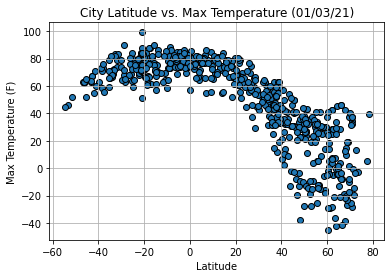

In [21]:
x_values = weather_df['Lat']
y_values = weather_df['Max Temp']
plt.scatter(x_values,y_values, edgecolors = 'black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (01/03/21)')
plt.grid(axis='both')
plt.show()

## Latitude vs. Humidity Plot

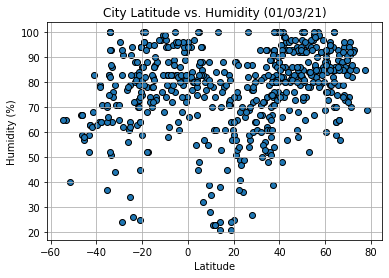

In [22]:
x_values = weather_df['Lat']
y_values = weather_df['Humidity']
plt.scatter(x_values,y_values, edgecolors = 'black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (01/03/21)')
plt.grid(axis='both')
plt.show()

## Latitude vs. Cloudiness Plot

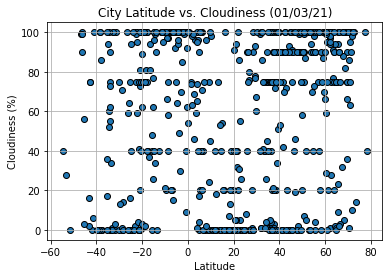

In [23]:
x_values = weather_df['Lat']
y_values = weather_df['Cloudiness']
plt.scatter(x_values,y_values, edgecolors = 'black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (01/03/21)')
plt.grid(axis='both')
plt.show()

## Latitude vs. Wind Speed Plot

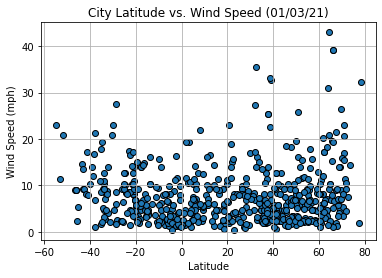

In [24]:
x_values = weather_df['Lat']
y_values = weather_df['Wind Speed']
plt.scatter(x_values,y_values, edgecolors = 'black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (01/03/21)')
plt.grid(axis='both')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


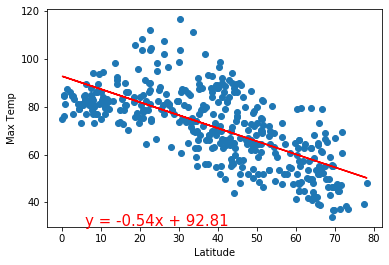

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


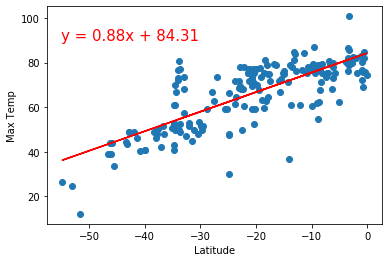

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


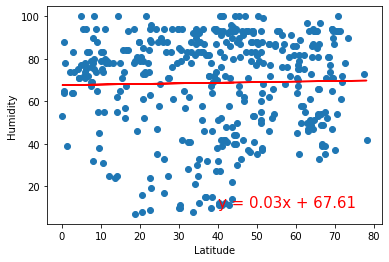

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


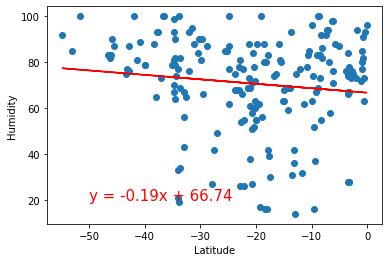

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


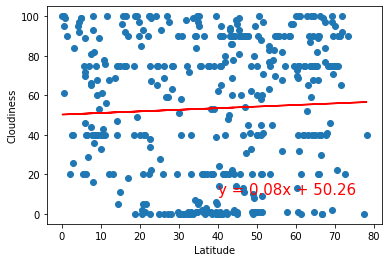

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


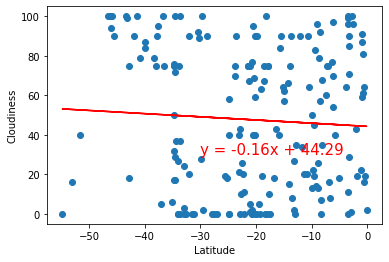

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


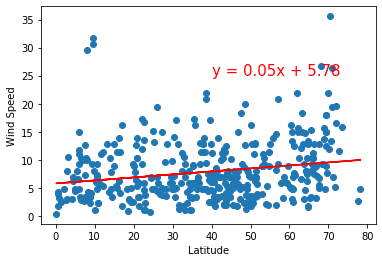

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


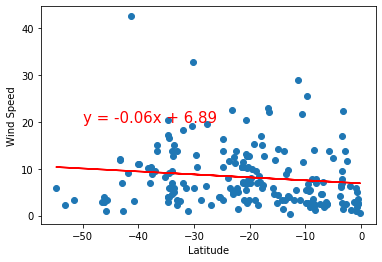